In [1]:
# Initial imports.
import pandas as pd
import numpy as np
from datetime import date, timedelta
from matplotlib import pyplot as plt
# from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [2]:
# Loading weather data
weather_df = pd.read_csv("Data_for_MachineLearningModel/test_timeseries.csv")
weather_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [3]:
# Loading soil data
soil_df = pd.read_csv("Data_for_MachineLearningModel/soil_data.csv")
soil_df.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [36]:
# Limit the weather data to Texas
texas_weather = weather_df.loc[weather_df["fips"] >= 48000]
texas_weather = texas_weather.loc[weather_df["fips"] <= 48999]

In [37]:
# Merge the Texas weather dataframe with the soil dataframe for each county
texas_drought = pd.merge(texas_weather, soil_df, on='fips')
texas_drought

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,48001,2019-01-01,0.13,100.79,5.50,6.65,5.21,5.11,10.88,2.71,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
1,48001,2019-01-02,41.48,100.66,5.36,5.57,4.85,4.82,6.63,4.40,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
2,48001,2019-01-03,11.94,100.13,5.19,5.10,4.30,4.25,7.71,0.55,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
3,48001,2019-01-04,0.00,100.20,5.02,5.91,3.84,3.55,12.91,-0.25,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
4,48001,2019-01-05,0.00,100.56,6.34,9.13,7.25,7.09,17.84,3.22,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185669,48507,2020-12-27,0.15,98.98,5.73,13.42,5.62,9.52,23.64,5.57,...,0.000000,8.432994,8.432994,1,1,2,2,1,1,3
185670,48507,2020-12-28,0.85,99.17,10.15,18.05,14.13,16.09,26.02,10.24,...,0.000000,8.432994,8.432994,1,1,2,2,1,1,3
185671,48507,2020-12-29,1.56,98.71,10.87,20.17,15.15,17.66,26.36,16.61,...,0.000000,8.432994,8.432994,1,1,2,2,1,1,3
185672,48507,2020-12-30,8.47,98.39,9.59,16.53,13.12,14.83,24.90,8.39,...,0.000000,8.432994,8.432994,1,1,2,2,1,1,3


In [38]:
# Remove unnecessary data
# Drop redundant weather data
texas_drought = texas_drought.drop(['T2MDEW', 'T2MWET', 'T2M_RANGE', 'WS10M_RANGE', 'WS50M_RANGE'], axis=1)
# Drop unnecessary soil data
texas_drought = texas_drought.drop(['lat', 'lon'], axis=1)

In [39]:
# Address NaN scores
# Drop NaN drought scores
#texas_drought.dropna(inplace=True)
# Set NaN drought scores to the most recent
texas_drought.fillna(method='ffill', inplace=True)
texas_drought.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2M_MAX,T2M_MIN,TS,WS10M,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,48001,2019-01-01,0.13,100.79,5.50,6.65,10.88,2.71,6.66,4.22,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
1,48001,2019-01-02,41.48,100.66,5.36,5.57,6.63,4.40,5.58,3.69,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
2,48001,2019-01-03,11.94,100.13,5.19,5.10,7.71,0.55,5.02,3.17,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
3,48001,2019-01-04,0.00,100.20,5.02,5.91,12.91,-0.25,4.85,3.11,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1
4,48001,2019-01-05,0.00,100.56,6.34,9.13,17.84,3.22,7.96,2.88,...,50.254311,0.180426,50.434738,3,2,1,1,1,1,1


In [40]:
# Add scores for one week out to texas_drought dataframe (These are the scores we are trying to predict)
# Create new dataframe with dates and scores
week_later = texas_drought[['fips', 'date', 'score']]
week_later['prediction_date'] = week_later['date']

# Adjust the date forward seven days to get the week_before scores
time_delta = timedelta(-7)
texas_drought['date'] = pd.to_datetime(texas_drought['date'])
week_later['date'] = pd.to_datetime(week_later['date'])
week_later['prediction_date'] = week_later['date']
week_later['date'] = week_later['date'] + time_delta

# Merge the week_before scores into the texas_drought dataframe
texas_drought = pd.merge(texas_drought, week_later,  how='inner', left_on=['fips','date'], right_on = ['fips','date'])
texas_drought.head()

/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,fips,date,PRECTOT,PS,QV2M,T2M,T2M_MAX,T2M_MIN,TS,WS10M,...,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,score_y,prediction_date
0,48001,2019-01-01,0.13,100.79,5.50,6.65,10.88,2.71,6.66,4.22,...,50.434738,3,2,1,1,1,1,1,0.0,2019-01-08
1,48001,2019-01-02,41.48,100.66,5.36,5.57,6.63,4.40,5.58,3.69,...,50.434738,3,2,1,1,1,1,1,0.0,2019-01-09
2,48001,2019-01-03,11.94,100.13,5.19,5.10,7.71,0.55,5.02,3.17,...,50.434738,3,2,1,1,1,1,1,0.0,2019-01-10
3,48001,2019-01-04,0.00,100.20,5.02,5.91,12.91,-0.25,4.85,3.11,...,50.434738,3,2,1,1,1,1,1,0.0,2019-01-11
4,48001,2019-01-05,0.00,100.56,6.34,9.13,17.84,3.22,7.96,2.88,...,50.434738,3,2,1,1,1,1,1,0.0,2019-01-12


In [41]:
# Address seasonality
# Add values from one year prior to texas_drought dataframe
# Create new dataframe with dates and scores
year_before = texas_drought[['fips', 'date', 'score_x']]

# Adjust the date forward seven days to get the week_before scores
# This is 51 weeks before the current date, which is 52 weeks before the predicted date, 364-x
time_delta = timedelta(+357)
year_before['date'] = pd.to_datetime(year_before['date'])
year_before['date'] = year_before['date'] + time_delta

# Merge the year_before scores into the texas_drought dataframe
texas_drought = pd.merge(texas_drought, year_before,  how='inner', left_on=['fips','date'], right_on = ['fips','date'])
texas_drought.head()

/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,fips,date,PRECTOT,PS,QV2M,T2M,T2M_MAX,T2M_MIN,TS,WS10M,...,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,score_y,prediction_date,score_x_y
0,48001,2019-12-24,0.00,100.28,5.80,12.53,21.71,4.98,10.69,2.37,...,3,2,1,1,1,1,1,2.9912,2019-12-31,0.0
1,48001,2019-12-25,0.00,100.03,6.62,12.46,21.54,5.74,12.22,3.03,...,3,2,1,1,1,1,1,2.9912,2020-01-01,0.0
2,48001,2019-12-26,0.00,100.34,8.49,14.60,22.14,7.84,14.35,2.27,...,3,2,1,1,1,1,1,2.9912,2020-01-02,0.0
3,48001,2019-12-27,0.07,100.29,9.41,16.06,22.48,10.14,16.15,2.78,...,3,2,1,1,1,1,1,2.9912,2020-01-03,0.0
4,48001,2019-12-28,6.04,99.50,12.02,18.36,23.34,15.42,18.14,5.00,...,3,2,1,1,1,1,1,2.9912,2020-01-04,0.0


In [42]:
# Clean up the 'score' columns
# Reorder the columns
texas_drought = texas_drought[['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'score_x_x', 'prediction_date', 'score_y',
       'score_x_y']]
# Rename the score columns
texas_drought['score_to_be_predicted'] = texas_drought['score_y']
texas_drought['current_score'] = texas_drought['score_x_x']
texas_drought['score_year_before'] = texas_drought['score_x_y']
# Drop the old score columns
texas_drought.drop(['score_x_x', 'score_y', 'score_x_y'], axis=1, inplace=True)

In [43]:
texas_drought.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2M_MAX,T2M_MIN,TS,WS10M,...,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,prediction_date,score_to_be_predicted,current_score,score_year_before
0,48001,2019-12-24,0.00,100.28,5.80,12.53,21.71,4.98,10.69,2.37,...,2,1,1,1,1,1,2019-12-31,2.9912,2.9912,0.0
1,48001,2019-12-25,0.00,100.03,6.62,12.46,21.54,5.74,12.22,3.03,...,2,1,1,1,1,1,2020-01-01,2.9912,2.9912,0.0
2,48001,2019-12-26,0.00,100.34,8.49,14.60,22.14,7.84,14.35,2.27,...,2,1,1,1,1,1,2020-01-02,2.9912,2.9912,0.0
3,48001,2019-12-27,0.07,100.29,9.41,16.06,22.48,10.14,16.15,2.78,...,2,1,1,1,1,1,2020-01-03,2.9912,2.9912,0.0
4,48001,2019-12-28,6.04,99.50,12.02,18.36,23.34,15.42,18.14,5.00,...,2,1,1,1,1,1,2020-01-04,2.9912,2.9912,0.0


In [44]:
# Define the features set.
X = texas_drought.copy()
X = X.drop("score_to_be_predicted", axis=1)
X = X.drop("date", axis=1)
X = X.drop("prediction_date", axis=1)
X = X.drop("fips", axis=1)

X.head()

,PRECTOT,PS,QV2M,T2M,T2M_MAX,T2M_MIN,TS,WS10M,WS10M_MAX,WS10M_MIN,...,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,current_score,score_year_before
0,0.00,100.28,5.80,12.53,21.71,4.98,10.69,2.37,3.27,1.43,...,50.434738,3,2,1,1,1,1,1,2.9912,0.0
1,0.00,100.03,6.62,12.46,21.54,5.74,12.22,3.03,4.33,1.91,...,50.434738,3,2,1,1,1,1,1,2.9912,0.0
2,0.00,100.34,8.49,14.60,22.14,7.84,14.35,2.27,3.01,0.57,...,50.434738,3,2,1,1,1,1,1,2.9912,0.0
3,0.07,100.29,9.41,16.06,22.48,10.14,16.15,2.78,3.73,1.85,...,50.434738,3,2,1,1,1,1,1,2.9912,0.0
4,6.04,99.50,12.02,18.36,23.34,15.42,18.14,5.00,8.64,2.70,...,50.434738,3,2,1,1,1,1,1,2.9912,0.0


In [45]:
# Define the target set.
y = texas_drought["score_to_be_predicted"].ravel()
y[:5]

array([2.9912, 2.9912, 2.9912, 2.9912, 2.9912])

In [46]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create a random forest Regressor.
rf_model = RandomForestRegressor(n_estimators=128, random_state=1) 

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [50]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [51]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
mape = np.mean(np.abs((y_test - predictions) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.11395177801839734
Mean Squared Error (MSE): 0.03870444769778442
Root Mean Squared Error (RMSE): 0.19673445986350338
Mean Absolute Percentage Error (MAPE): nan
Accuracy: nan


/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/travisdharry/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [222]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.00000000e+00, 9.55618500e-04, 3.83792429e-03, 0.00000000e+00,
       0.00000000e+00, 3.48119086e-04, 2.64886438e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.93116518e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.66154603e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.87112154e-01, 0.00000000e+00])

[Text(418.5, 475.65000000000003, 'X[42] <= 0.342\nmse = 1.561\nsamples = 44048\nvalue = 1.077'),
 Text(209.25, 339.75, 'X[42] <= -0.729\nmse = 0.572\nsamples = 30157\nvalue = 0.523'),
 Text(104.625, 203.85000000000002, 'X[6] <= -0.929\nmse = 0.268\nsamples = 19155\nvalue = 0.274'),
 Text(52.3125, 67.94999999999999, 'mse = 0.11\nsamples = 4325\nvalue = 0.101'),
 Text(156.9375, 67.94999999999999, 'mse = 0.302\nsamples = 14830\nvalue = 0.324'),
 Text(313.875, 203.85000000000002, 'X[2] <= 1.354\nmse = 0.805\nsamples = 11002\nvalue = 0.956'),
 Text(261.5625, 67.94999999999999, 'mse = 0.823\nsamples = 9496\nvalue = 1.034'),
 Text(366.1875, 67.94999999999999, 'mse = 0.412\nsamples = 1506\nvalue = 0.467'),
 Text(627.75, 339.75, 'X[42] <= 1.744\nmse = 1.593\nsamples = 13891\nvalue = 2.281'),
 Text(523.125, 203.85000000000002, 'X[42] <= 0.885\nmse = 1.121\nsamples = 10919\nvalue = 1.926'),
 Text(470.8125, 67.94999999999999, 'mse = 0.923\nsamples = 5369\nvalue = 1.637'),
 Text(575.4375, 67.949999

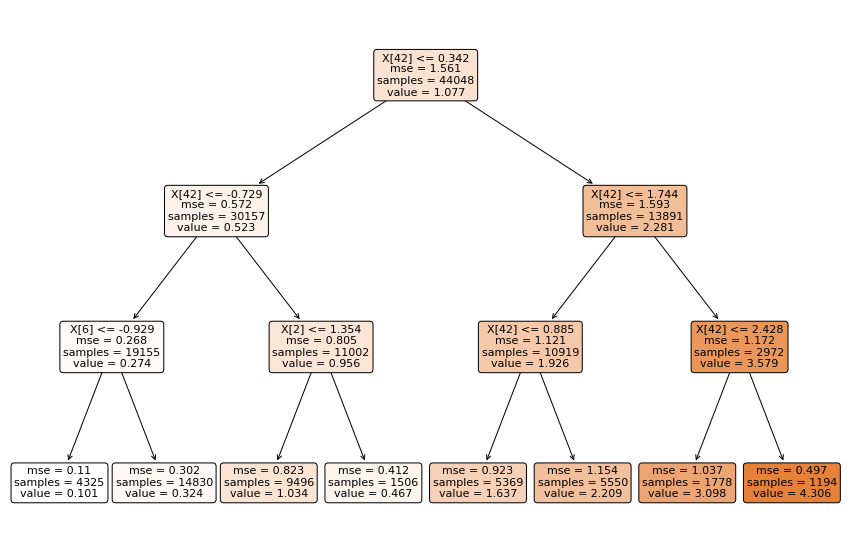

In [223]:
# Visualize the Random Forest model

fig = plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], 
          filled=True, impurity=True, 
          rounded=True)